## Regularization 

<ul>
<li>A model will have a low accuracy if it is overfitting. </li>
<li>Overfitting occurs when model is trying too hard to capture the noise (samples that don't represent true pattern)
    in your training dataset.</li>
<li>When model is more flexible, it is prone to overfitting</li>
<li>Regularization shrinks the coefficients (parameter or slops) towards zero to discourages a more complex or flexible model, so as to avoid the risk of overfitting</li>
    <li>Ridge and Lasso are two options </li>
    <li>Regularization strength is provided by parameter <b>alpha</b></li>
</ul>    

In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score
import warnings 
warnings.filterwarnings(action='ignore')

In [2]:
X_train = pd.DataFrame({'sqft':[1000,2000,3000,4000,5000]})
y_train = pd.Series([60,65,70,80,85])
X_test = pd.DataFrame({'sqft':[2200,1000,4200,2100] })
y_test = pd.Series([65,45,65,60])

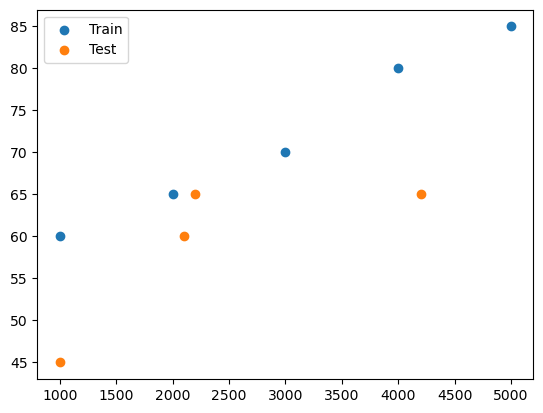

In [3]:
plt.scatter(X_train.sqft, y_train, label='Train')
plt.scatter(X_test.sqft, y_test, label = 'Test')
plt.legend()

### LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [6]:
lr_model.coef_

array([0.0065])

In [7]:
y_pred = lr_model.predict(X_train)

In [8]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  1.5
RMSE     :  1.224744871391589
R2 Score :  0.9825581395348837


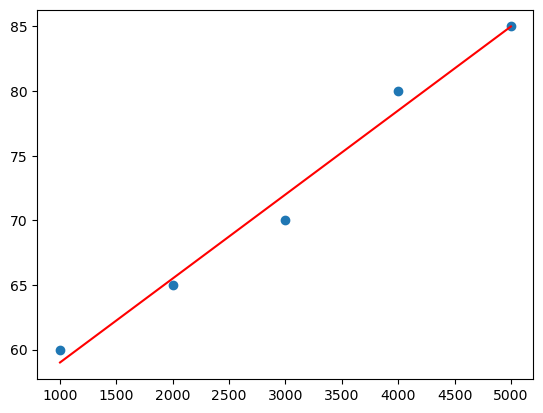

In [9]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred,'r-')

In [10]:
y_pred = lr_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  114.02562499999998
RMSE     :  10.678278185175735
R2 Score :  -0.6971255813953485


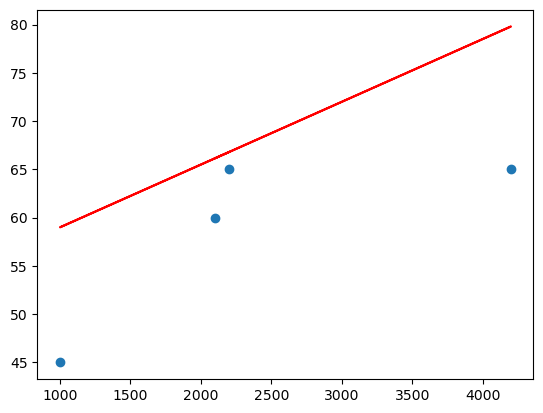

In [12]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred,'r-')

## Ridge Regression (L2)

In [13]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [14]:
# ss = StandardScaler()
# X_train_scaled = ss.fit_transform(X_train)

In [15]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train,y_train)

,alpha,10.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [16]:
ridge.coef_

array([0.00649999])

In [17]:
y_pred = ridge.predict(X_train)

In [18]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  1.5000000000845055
RMSE     :  1.2247448714260882
R2 Score :  0.9825581395339011


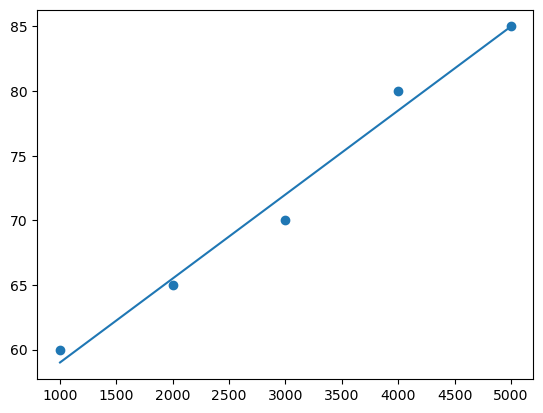

In [19]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [20]:
y_pred = ridge.predict(X_test)

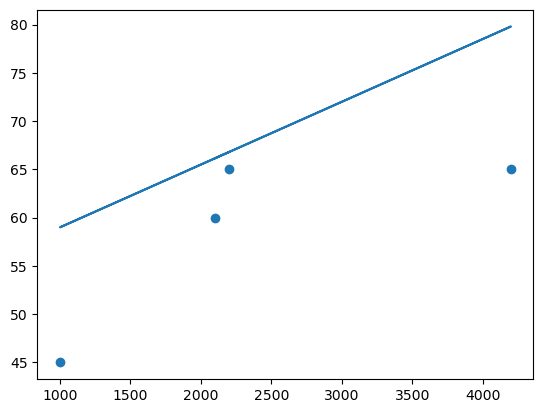

In [21]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [22]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  114.0256809487667
RMSE     :  10.67828080492205
R2 Score :  -0.6971264141211788


## LassoCV

In [23]:
from sklearn.linear_model import LassoCV

In [24]:
lasso = LassoCV(cv = 3, alphas = [.25, .5, 1, 2,4,6, 10, 20])
lasso.fit(X_train,y_train)

,eps,0.001
,n_alphas,'deprecated'
,alphas,"[0.25, 0.5, ...]"
,fit_intercept,True
,precompute,'auto'
,max_iter,1000
,tol,0.0001
,copy_X,True
,cv,3
,verbose,False
,n_jobs,None


In [25]:
lasso.coef_

array([0.00649])

In [26]:
lasso.alpha_

np.float64(20.0)

In [27]:
y_pred = lasso.predict(X_train)

In [28]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  1.5001999999999944
RMSE     :  1.2248265183282057
R2 Score :  0.9825558139534885


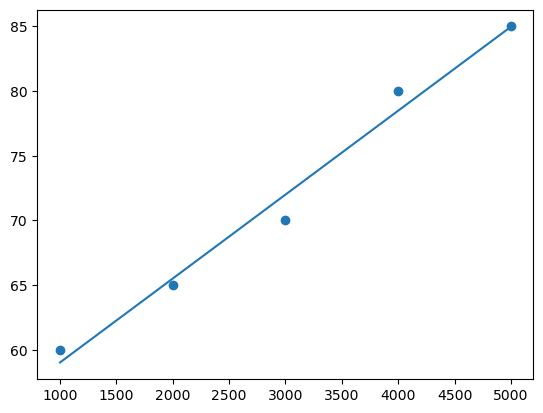

In [29]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [30]:
y_pred = lasso.predict(X_test)

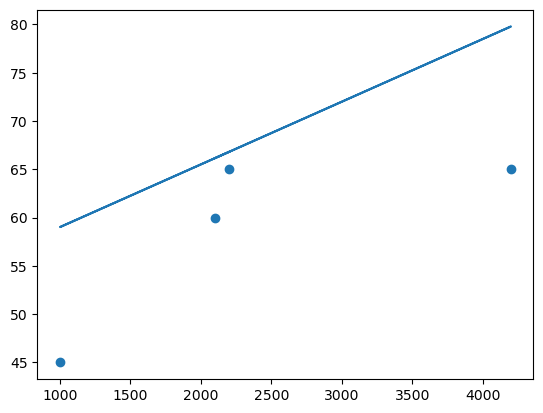

In [31]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [32]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  114.11187225000003
RMSE     :  10.68231586548535
R2 Score :  -0.6984092613953494
